In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Define the target output data
y = np.array([0, 1, 1, 0])

# Define the learning rate
learning_rate = 0.1

# Define the number of neurons in the hidden layer
hidden_layer_size = 2

# Define the initial weights and biases for the hidden layer
hidden_layer_weights = np.random.normal(size=(2, hidden_layer_size))
hidden_layer_bias = np.zeros(hidden_layer_size)

# Define the initial weights and bias for the output layer
output_layer_weights = np.random.normal(size=(hidden_layer_size, 1))
output_layer_bias = 0.0

# Define the activation function (sigmoid function)
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# Define the derivative of the activation function (sigmoid function)
def sigmoid_derivative(x):
    return x * (1.0 - x)

# Train the perceptron
for i in range(10000):
    # Forward propagation
    hidden_layer_activation = sigmoid(np.dot(X, hidden_layer_weights) + hidden_layer_bias)
    output_layer_activation = sigmoid(np.dot(hidden_layer_activation, output_layer_weights) + output_layer_bias)

    # Backpropagation
    output_layer_error = y.reshape(-1, 1) - output_layer_activation
    output_layer_delta = output_layer_error * sigmoid_derivative(output_layer_activation)

    hidden_layer_error = output_layer_delta.dot(output_layer_weights.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_activation)

    # Update the weights and biases
    output_layer_weights += hidden_layer_activation.T.dot(output_layer_delta) * learning_rate
    output_layer_bias += np.sum(output_layer_delta, axis=0, keepdims=True) * learning_rate

    hidden_layer_weights += X.T.dot(hidden_layer_delta) * learning_rate
    hidden_layer_bias += np.sum(hidden_layer_delta, axis=0) * learning_rate


# Predictions
t= np.array([[1,1]])
hidden_layer_activation = sigmoid(np.dot(t, hidden_layer_weights) + hidden_layer_bias)
output_layer_activation = sigmoid(np.dot(hidden_layer_activation, output_layer_weights) + output_layer_bias)
a2 = np.squeeze(output_layer_activation)
if a2>=0.5:
    print("For input", t[0], "output is 1")
else:
    print("For input", t[0], "output is 0")
#print(output_layer_activation)

For input [1 1] output is 0


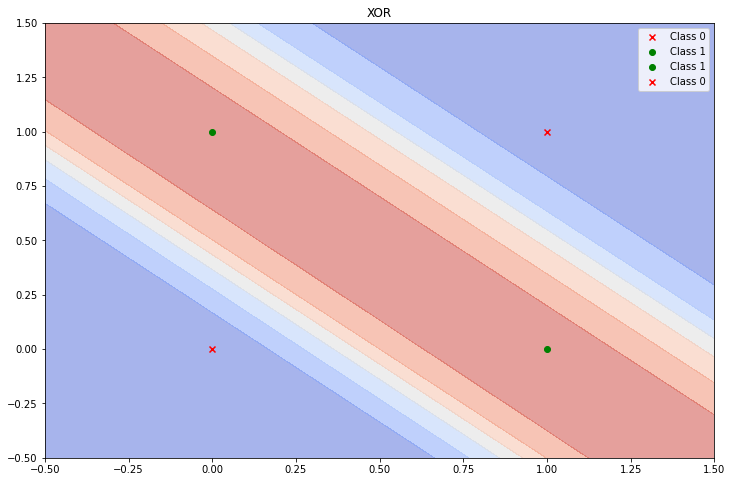

In [2]:
# Plot the decision boundary
plt.figure(figsize=(12, 8))
x1 = np.linspace(-0.5, 1.5, 10)
x2 = np.linspace(-0.5, 1.5, 10)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        hidden_layer_activation = sigmoid(np.dot(np.array([X1[i,j], X2[i,j]]), hidden_layer_weights)+ hidden_layer_bias)
        output_layer_activation = sigmoid(np.dot(hidden_layer_activation, output_layer_weights)+ output_layer_bias)
        Z[i,j] = output_layer_activation[0]
plt.contourf(X1, X2, Z, cmap='coolwarm', alpha=0.5)
#plt.colorbar()
# Plot the input data
for i in range(len(X)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='red', marker='x', label='Class 0')
    else:
        plt.scatter(X[i][0], X[i][1], color='green', marker='o', label='Class 1')

# Add labels and legend

plt.title('XOR')
plt.legend()
plt.show()
